# Delaunay Triangulation Area Distribution

Trying to determine the distribution of the areas of simplices obtained via Delaunay triangulation.
The points used for the triangulation are normally distributed.

In [85]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import pandas as pd

plt.rcParams["figure.figsize"] = (9, 8) # (w, h)

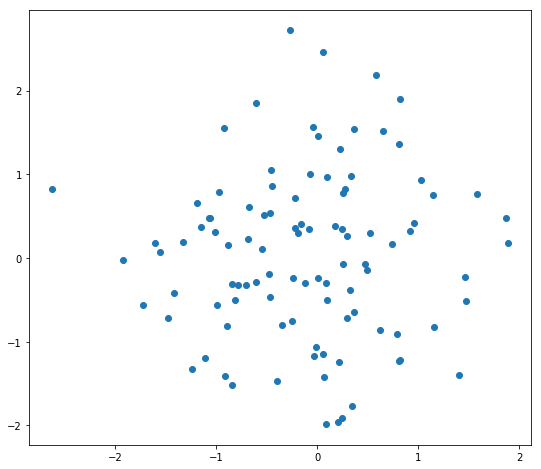

In [29]:
np.random.seed(42)
nb_points = 100

points = np.random.normal(loc=0.0, scale=1.0, size=nb_points*2).reshape(nb_points, 2)
plt.scatter(points[:, 0], points[:, 1])

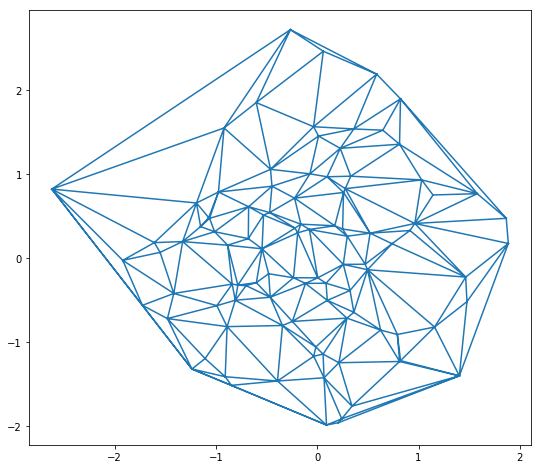

In [30]:
tri = Delaunay(points)

plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())

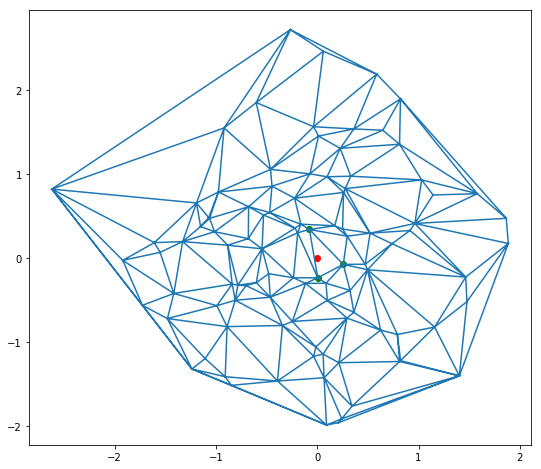

In [33]:
simplex_index = tri.find_simplex([0.0, 0.0])
simplex_points_indices = tri.simplices[simplex_index]

plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
plt.scatter(points[simplex_points_indices[0], 0], points[simplex_points_indices[0], 1], color="green")
plt.scatter(points[simplex_points_indices[1], 0], points[simplex_points_indices[1], 1], color="green")
plt.scatter(points[simplex_points_indices[2], 0], points[simplex_points_indices[2], 1], color="green")
plt.scatter(0.0, 0.0, color="red")

(-2.6197451040897444, -1.9875689146008928, 1.8861859012105302, 2.720169166589619)
width: 4.505931005300274 | height: 4.707738081190511 | square_convex_hull_area: 21.212742984869145


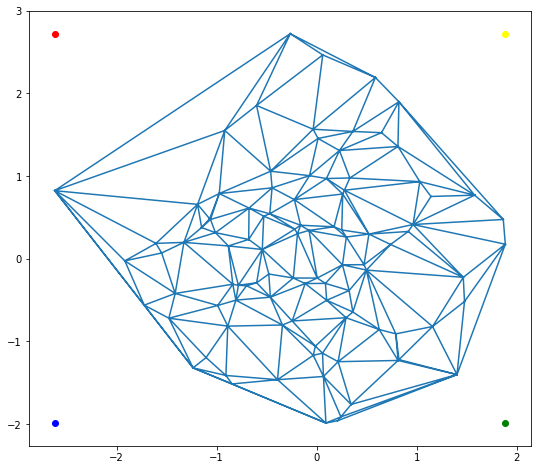

In [42]:
# Square Convex Hull
min_x, min_y, max_x, max_y = np.min(points[:, 0]), np.min(points[:, 1]), np.max(points[:, 0]), np.max(points[:, 1])
print((min_x, min_y, max_x, max_y))

width = max_x - min_x
height = max_y - min_y
square_convex_hull_area =  width * height
print("width: {} | height: {} | square_convex_hull_area: {}".format(width, height, square_convex_hull_area))

plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
plt.scatter(min_x, min_y, color="blue")
plt.scatter(min_x, max_y, color="red")
plt.scatter(max_x, min_y, color="green")
plt.scatter(max_x, max_y, color="yellow")

In [118]:
def random_point_in_square_hull():
    return [(np.random.random() * width) + min_x, (np.random.random() *height) + min_y]

nb_mc_points = 20000
mc_points = np.array([random_point_in_square_hull() for i in range(nb_mc_points)])

# plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
# plt.scatter(mc_points[:, 0], mc_points[:, 1], color="tab:orange")

In [119]:
mc_simplices = np.array([tri.find_simplex(point) for point in mc_points])

print("# MC points: {} | Points in hull: {} | Ratio: {}"
      .format(nb_mc_points, np.sum(mc_simplices != -1), np.sum(mc_simplices != -1) / nb_mc_points))

# MC points: 20000 | Points in hull: 12396 | Ratio: 0.6198


In [120]:
unique, counts = np.unique(mc_simplices[mc_simplices != -1], return_counts=True)
#dict(zip(unique, counts))

(array([135.,  31.,  15.,   3.,   1.,   0.,   0.,   0.,   1.,   1.]),
 array([  1. ,  73.1, 145.2, 217.3, 289.4, 361.5, 433.6, 505.7, 577.8,
        649.9, 722. ]),
 <a list of 10 Patch objects>)

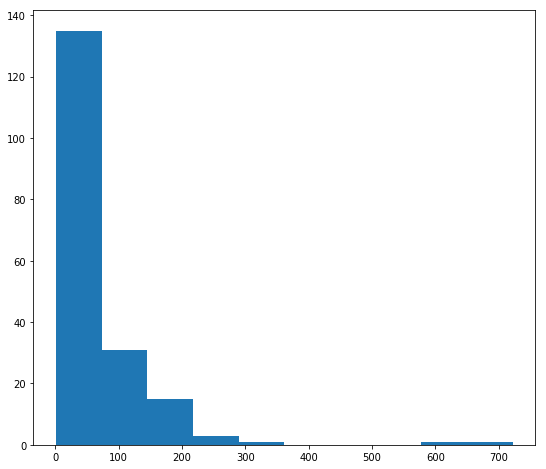

In [121]:
plt.hist(counts)

In [122]:
df_mc_simplices_hits = pd.DataFrame(data=list(zip(unique, counts)), columns=["simplex", "nb_hits"]).set_index("simplex")

top_ten_hits = df_mc_simplices_hits.sort_values(by="nb_hits", ascending=False).head(10)
top_ten_hits

,nb_hits
simplex,
15,722
35,622
77,320
16,275
109,270
44,261
48,217
76,213
159,213


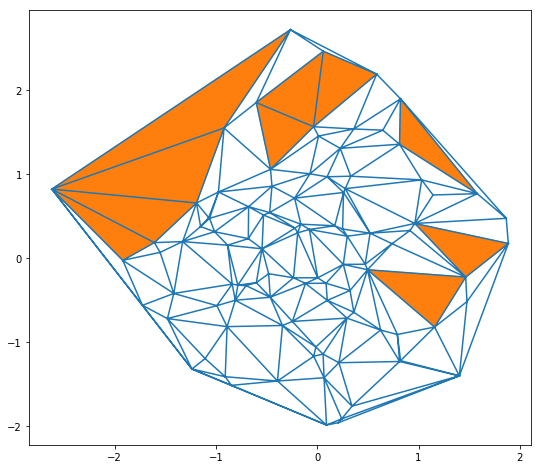

In [123]:
def draw_simplex(simplex_index):
    simplex_points_indices = tri.simplices[simplex_index]
    polygon = plt.Polygon(np.array([
        [points[simplex_points_indices[0], 0], points[simplex_points_indices[0], 1]],
        [points[simplex_points_indices[1], 0], points[simplex_points_indices[1], 1]],
        [points[simplex_points_indices[2], 0], points[simplex_points_indices[2], 1]]
    ]), color="tab:orange")
    plt.gca().add_patch(polygon)



plt.triplot(points[:, 0], points[:, 1], tri.simplices.copy())
for index in top_ten_hits.index:
    draw_simplex(index)